Look though files to see spring bloom 2018 in new 201702 Hindcast

In [17]:
from pathlib import Path

import arrow
import cmocean.cm as cm
from matplotlib.colors import LogNorm
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np

from salishsea_tools import visualisations, viz_tools

%matplotlib inline

In [24]:
basedirectory = Path('/results/SalishSea/hindcast/')
startdate = arrow.get('2018-02-22')
enddate = arrow.get('2018-03-14')

In [20]:
cmap_dia = plt.get_cmap(cm.matter)
cmap_dia.set_bad('burlywood')
cmap_flag = plt.get_cmap(cm.matter)
cmap_flag.set_bad('burlywood')
cmap_mzoo = plt.get_cmap(cm.matter)
cmap_mzoo.set_bad('burlywood')
cmap_nitrate = plt.get_cmap(cm.turbid)
cmap_nitrate.set_bad('burlywood')

In [5]:
imin, imax = 200, 600
jmin, jmax = 200, 350

In [6]:
with nc.Dataset('/ocean/sallen/allen/research/MEOPAR/grid/mesh_mask201702.nc') as mesh_mask:
    tmask = 1-mesh_mask.variables['tmask'][0]

/results/SalishSea/hindcast/22feb18/SalishSea_1d_20180222_20180222_ptrc_T.nc
/results/SalishSea/hindcast/25feb18/SalishSea_1d_20180225_20180225_ptrc_T.nc
/results/SalishSea/hindcast/28feb18/SalishSea_1d_20180228_20180228_ptrc_T.nc
/results/SalishSea/hindcast/03mar18/SalishSea_1d_20180303_20180303_ptrc_T.nc
/results/SalishSea/hindcast/06mar18/SalishSea_1d_20180306_20180306_ptrc_T.nc
/results/SalishSea/hindcast/09mar18/SalishSea_1d_20180309_20180309_ptrc_T.nc
/results/SalishSea/hindcast/12mar18/SalishSea_1d_20180312_20180312_ptrc_T.nc


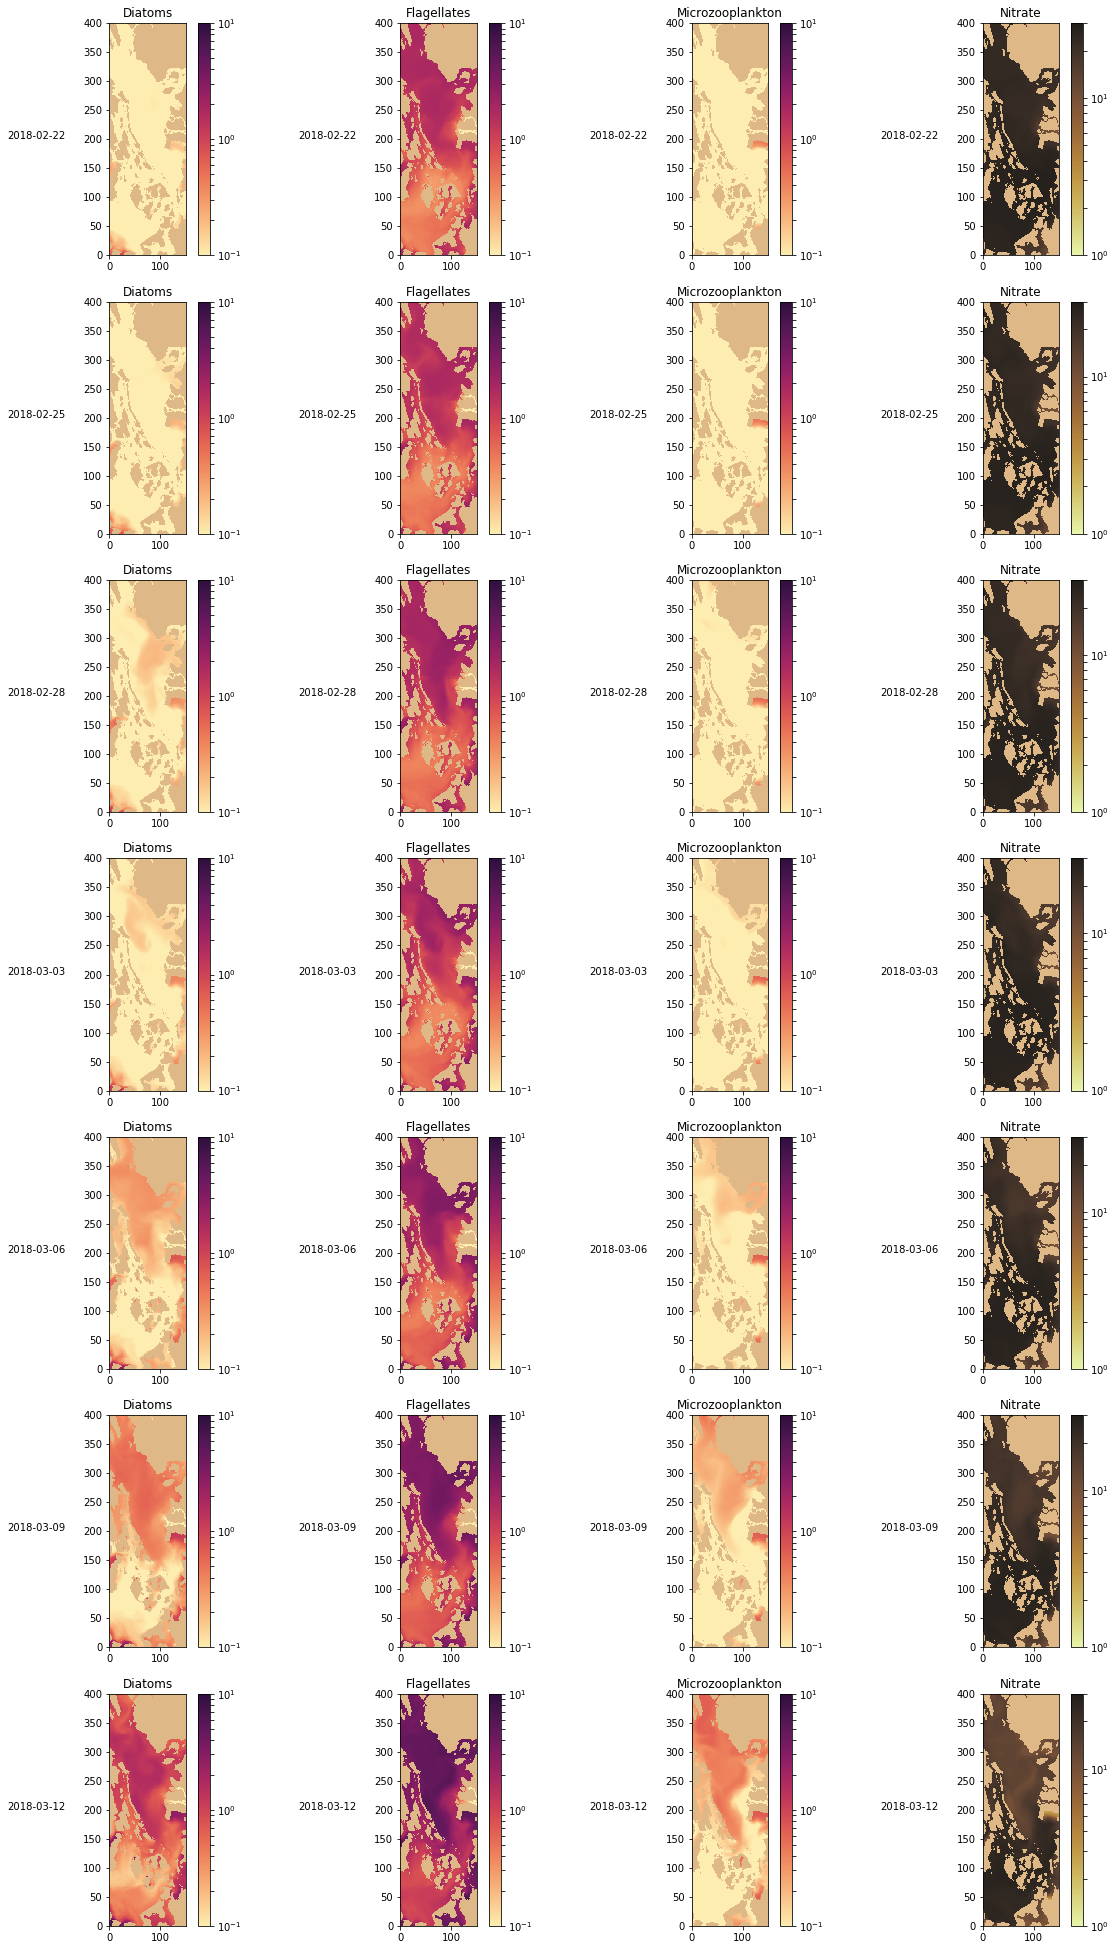

In [25]:
fig, axs = plt.subplots(7, 4, figsize=(20, 35))

for filesetd, date in enumerate(arrow.Arrow.range('day', startdate, enddate)):
    if filesetd % 3 == 0:
        fileset = int(filesetd/3)
        directory = Path(date.format('DDMMMYY').lower())
        filename = f'SalishSea_1d_{date.year}{date.month:02d}{date.day:02d}_{date.year}{date.month:02d}{date.day:02d}_ptrc_T.nc'
        print (basedirectory/directory/filename)
    
    
        with nc.Dataset(basedirectory/directory/filename) as ds:
        
            diatoms = ds.variables['diatoms'][0, 0, imin:imax, jmin:jmax]
            diatoms = np.ma.array(diatoms, mask=tmask[0, imin:imax, jmin:jmax])
            mesh = axs[fileset,0].pcolormesh(diatoms, cmap=cmap_dia, norm=LogNorm(vmin=0.1, vmax=10))
            fig.colorbar(mesh, ax=axs[fileset,0])
            axs[fileset,0].set_title('Diatoms')
        
            flagellates = ds.variables['flagellates'][0, 0, imin:imax, jmin:jmax]
            flagellates = np.ma.array(flagellates, mask=tmask[0, imin:imax, jmin:jmax])
            mesh = axs[fileset,1].pcolormesh(flagellates, cmap=cmap_flag, norm=LogNorm(vmin=0.1, vmax=10))
            fig.colorbar(mesh, ax=axs[fileset,1])
            axs[fileset,1].set_title('Flagellates')
        
            microzoo = ds.variables['microzooplankton'][0, 0, imin:imax, jmin:jmax]
            microzoo = np.ma.array(microzoo, mask=tmask[0, imin:imax, jmin:jmax])
            mesh = axs[fileset,2].pcolormesh(microzoo, cmap=cmap_mzoo, norm=LogNorm(vmin=0.1, vmax=10))
            fig.colorbar(mesh, ax=axs[fileset,2])
            axs[fileset,2].set_title('Microzooplankton')
        
            nitrate = ds.variables['nitrate'][0, 0, imin:imax, jmin:jmax]
            nitrate = np.ma.array(nitrate, mask=tmask[0, imin:imax, jmin:jmax])
            mesh = axs[fileset,3].pcolormesh(nitrate, cmap=cmap_nitrate, norm=LogNorm(vmin=1, vmax=30))
            fig.colorbar(mesh, ax=axs[fileset,3])
            axs[fileset,3].set_title('Nitrate')
        
            for ax in [axs[fileset,0], axs[fileset,1], axs[fileset,2], axs[fileset,3]]:
                viz_tools.set_aspect(ax)
                ax.text(-200, 200, f'{date.year}-{date.month:02d}-{date.day:02d}')
        